![rmotr](https://user-images.githubusercontent.com/7065401/39119486-4718e386-46ec-11e8-9fc3-5250a49ef570.png)
<hr style="margin-bottom: 40px;">

<img src="https://archive.ics.uci.edu/ml/assets/MLimages/Large2.jpg"
    style="width:200px; float: right; margin: 0 40px 40px 40px;"></img>

# Project assignment: US Census Analysis

<i>
> Dataset source: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data <br>
> Dataset description: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
</i>

We will be working with an extraction of data done by Barry Becker from the 1994 Census database.

**[Dataset information and columns](Dataset Info.ipynb)**

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize': (18, 6)})

### Loading the Dataset

The data is located in the `data/census-data.csv` CSV file. Take a look at the structure of it and the fields it has. You will notice that **it doesn't have a header**. 

In [90]:
df = pd.read_csv('data/census-data.csv', sep=', ', engine='python', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


We used a few special parameters to correctly parse the csv. As the header is missing, pandas is assigning numbers to the columns.

**This is when the fun starts...**
<br><br><br>

---

### Exercise: Rename the columns

Use the names contained in `col_names` to properly name the columns (and replace the numbers). 

In [91]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
             'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
             'hours-per-week', 'native-country', 'income']

In [92]:
df.columns = col_names

Once everything works, it'll look something like this:

In [93]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Exercise: Cleaning the data

You'll notice that some columns have invalid values (`workclass`, `occupation`, and `native-country`).

###### a. What are those invalid values?

Identify the invalid values of `workclass` (spoiler, it's a `?` question mark):

In [95]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [97]:
df['workclass']=df['workclass'].replace('?',np.nan)

In [94]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [96]:
df['native-country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [98]:
df['occupation']=df['occupation'].replace('?',np.nan)

In [99]:
df['native-country']=df['native-country'].replace('?',np.nan)

In [101]:
# df=df.replace('?',np.nan)
df=df.dropna()

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
age               30162 non-null int64
workclass         30162 non-null object
fnlwgt            30162 non-null int64
education         30162 non-null object
education-num     30162 non-null int64
marital-status    30162 non-null object
occupation        30162 non-null object
relationship      30162 non-null object
race              30162 non-null object
sex               30162 non-null object
capital-gain      30162 non-null int64
capital-loss      30162 non-null int64
hours-per-week    30162 non-null int64
native-country    30162 non-null object
income            30162 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30718 entries, 0 to 32560
Data columns (total 15 columns):
age               30718 non-null int64
workclass         30718 non-null object
fnlwgt            30718 non-null int64
education         30718 non-null object
education-num     30718 non-null int64
marital-status    30718 non-null object
occupation        30718 non-null object
relationship      30718 non-null object
race              30718 non-null object
sex               30718 non-null object
capital-gain      30718 non-null int64
capital-loss      30718 non-null int64
hours-per-week    30718 non-null int64
native-country    30718 non-null object
income            30718 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


###### b. Removing those rows

Your task now is to remove those invalid rows (all the ones containing `?`). There are different ways of doing this, so this is entirely up to you. This is the expected output of your dataframe:

In [67]:
# Result:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30718 entries, 0 to 32560
Data columns (total 15 columns):
age               30718 non-null int64
workclass         30718 non-null object
fnlwgt            30718 non-null int64
education         30718 non-null object
education-num     30718 non-null int64
marital-status    30718 non-null object
occupation        30718 non-null object
relationship      30718 non-null object
race              30718 non-null object
sex               30718 non-null object
capital-gain      30718 non-null int64
capital-loss      30718 non-null int64
hours-per-week    30718 non-null int64
native-country    30718 non-null object
income            30718 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Exercise: Convert `income` to an ordered categorical type

As you'll see, `income` has two values `<=50K` and `>50K`:

In [16]:
df['income'].value_counts()

<=50K    22654
>50K      7508
Name: income, dtype: int64

In [68]:
df['income'] = pd.Categorical(df['income'], categories=['<=50K', '>50K'],
                               ordered=True)

Your job is to turn them into an **ORDERED** categorical type with the following order: `['<=50K', '>50K']`

In [69]:
# Expected result:
df['income'].dtype

CategoricalDtype(categories=['<=50K', '>50K'], ordered=True)

### Exercise: Create a dummy variable _">50K"_ or _"<=50K"_ and concatenate them to our dataframe.

In [19]:
# Expected result:

In [70]:
income_dummy=pd.get_dummies(df.income,prefix="income")

In [23]:
pd.concat([df,income_dummy],axis=1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_<=50K,income_>50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,1,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,1,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,0,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,0,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,0,1


### Exercise: Plot a **distplot** showing the distribution of `age`.

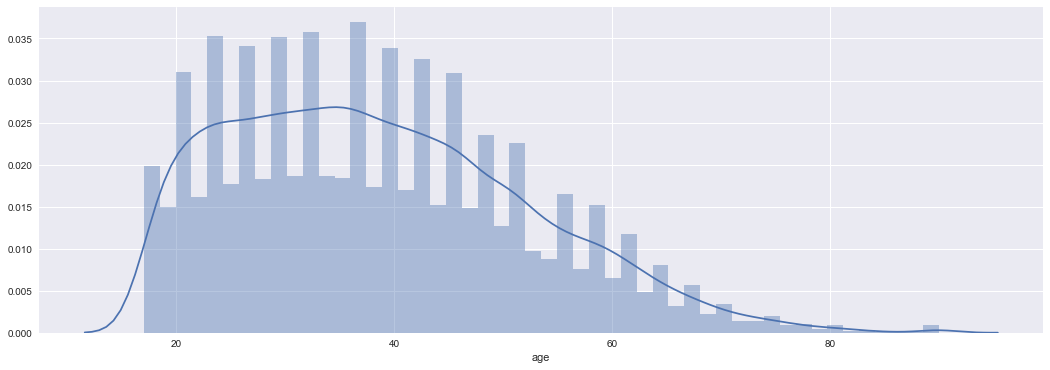

In [57]:
# Expected output

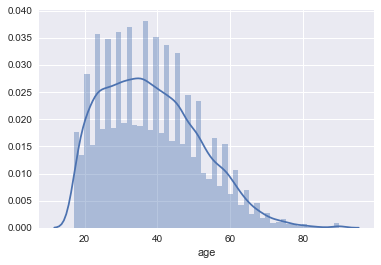

In [25]:
sns.distplot(df['age'],hist=True,kde=True)

### Exercise: Plot a **boxplot** showing the distribution of `age`.

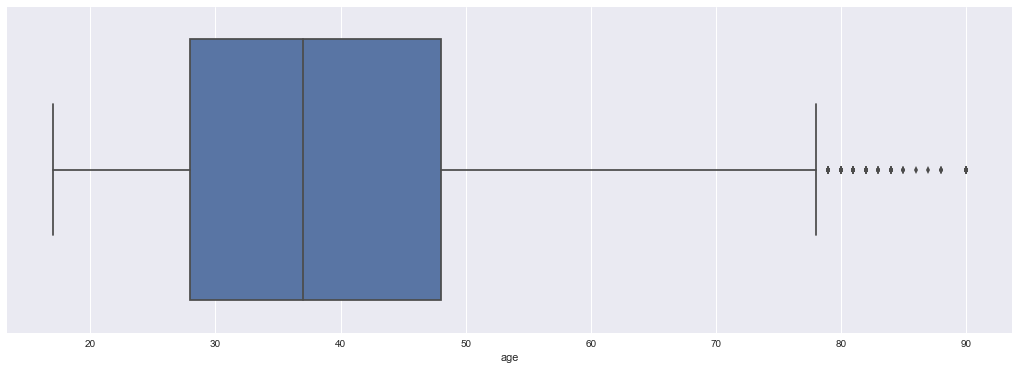

In [56]:
# Expected output

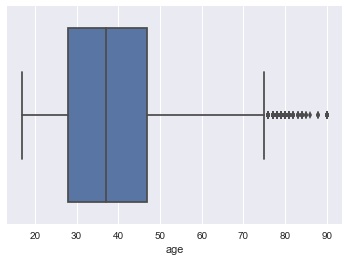

In [26]:
sns.boxplot(df['age'])

### Exercise: Remove outlier values from `age` and plot the previous boxplot again.

_Suppose values higher than 70 as outliers_.

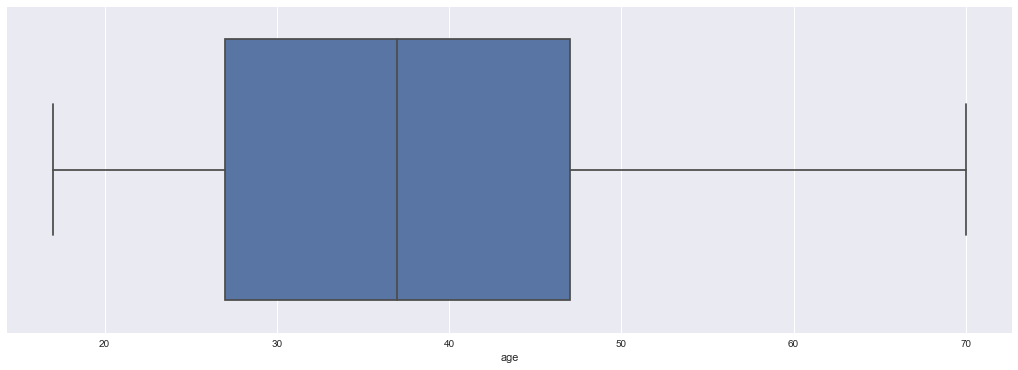

In [54]:
# Expected solution:

In [27]:
df= df[df['age']<=70]

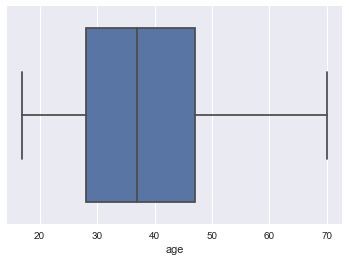

In [28]:
sns.boxplot(df['age'])

### Exercise: How many people work more than 20 hours per week?

In [22]:
# Expected output

29633

In [32]:
df['hours-per-week'].dtype

dtype('int64')

In [71]:
df[df['hours-per-week']>=20].count()

age               29361
workclass         29361
fnlwgt            29361
education         29361
education-num     29361
marital-status    29361
occupation        29361
relationship      29361
race              29361
sex               29361
capital-gain      29361
capital-loss      29361
hours-per-week    29361
native-country    29361
income            29361
dtype: int64

### Exercise: How many men and women are? Show totals and proportion over all the data.

In [25]:
# Expected output

Male count: 21790
Female count: 10771
Male proportion: 0.6692054912318418
Female proportion: 0.33079450876815825


In [73]:
df['sex'].value_counts()

Male      20788
Female     9930
Name: sex, dtype: int64

In [103]:
sex_column = df["sex"]

num_male = sex_column[sex_column == 'Male'].count()
print("Male count: {}".format(num_male))

num_female = sex_column[sex_column == 'Female'].count()
print("Female count: {}".format(num_female))

total_rows = len(sex_column)

male_prop = num_male / total_rows
print("Male proportion: {}".format(male_prop))

female_prop = num_female / total_rows
print("Female proportion: {}".format(female_prop))

Male count: 20380
Female count: 9782
Male proportion: 0.6756846362973278
Female proportion: 0.3243153637026722


### Exercise: Plot a bar plot showing the income by gender

_Hint: Check [countplots](https://seaborn.pydata.org/tutorial/categorical.html#bar-plots) in Seaborn docs_

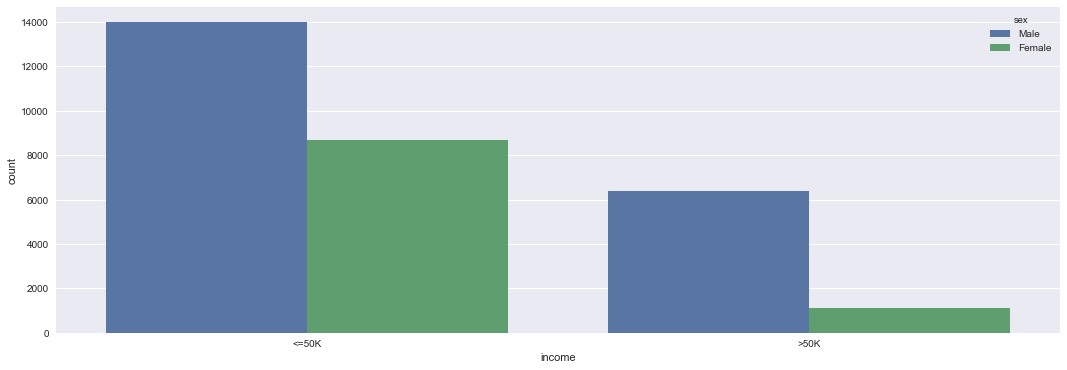

In [65]:
# Expected Result:

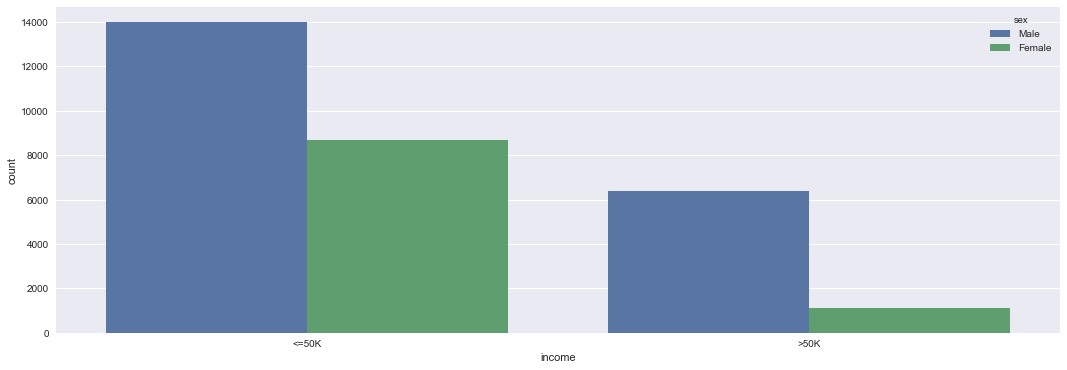

In [104]:
sns.countplot(x='income',hue='sex',data=df)

### Exercise: Create a bar plot showing count of `race`s

It should look like this:

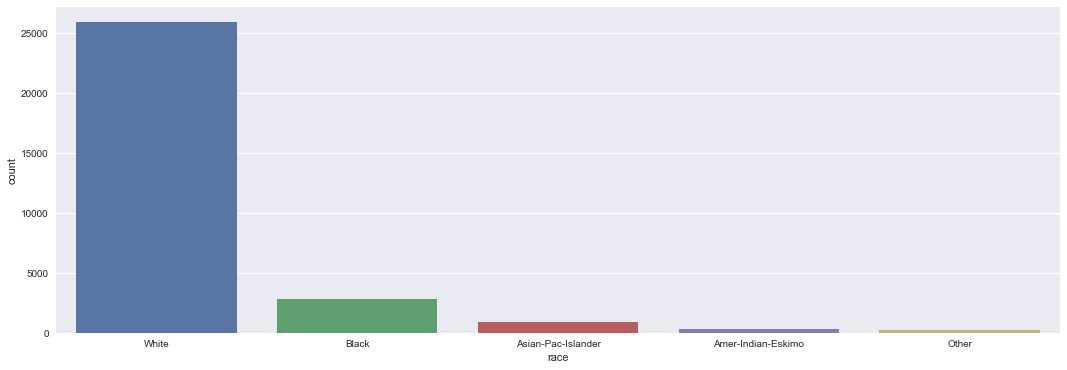

In [84]:
# Expected result

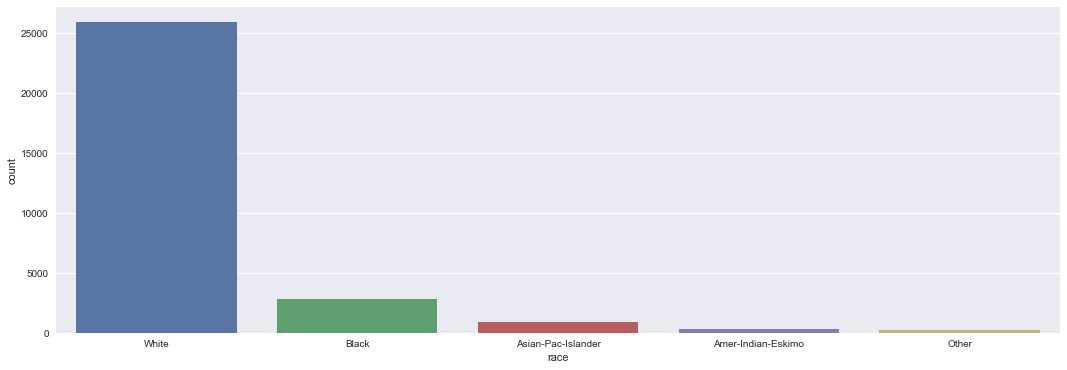

In [105]:
sns.countplot(x='race',data=df)

### Exercise: Count per `race`

Using grouping and aggregation functions, count how many people are per each race:

In [18]:
# Expected result:

,race,count
0,Amer-Indian-Eskimo,311
1,Asian-Pac-Islander,1039
2,Black,3124
3,Other,271
4,White,27816


In [111]:
df.groupby('race')['race'].count()

race
Amer-Indian-Eskimo      286
Asian-Pac-Islander      895
Black                  2817
Other                   231
White                 25933
Name: race, dtype: int64

### Exercise: Create a barplot with the `occupation` column

We want to check the number of people for each `occupation`. In this case, we want to see a nice, sorted plot like this one:

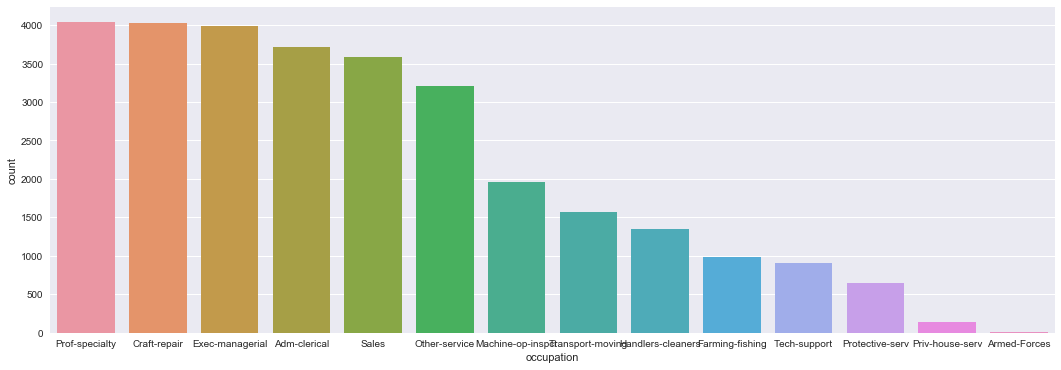

In [80]:
# Expected result:

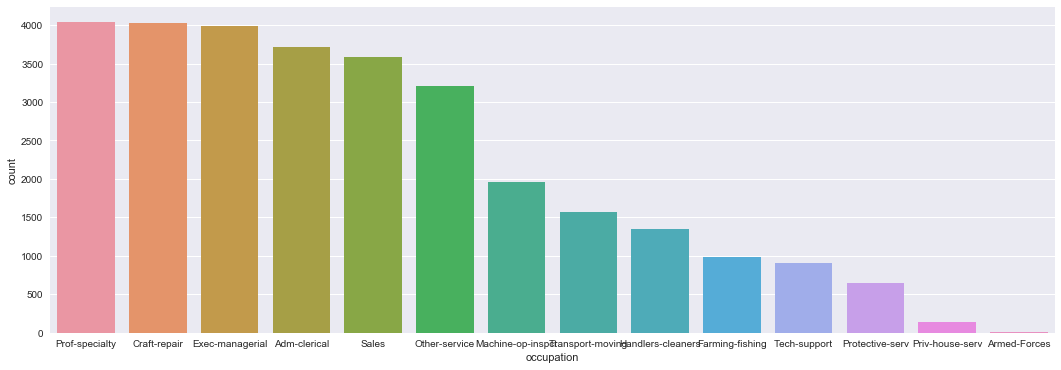

In [137]:
# option 1
sns.countplot(x='occupation',data=df,order=df.occupation.value_counts().index)

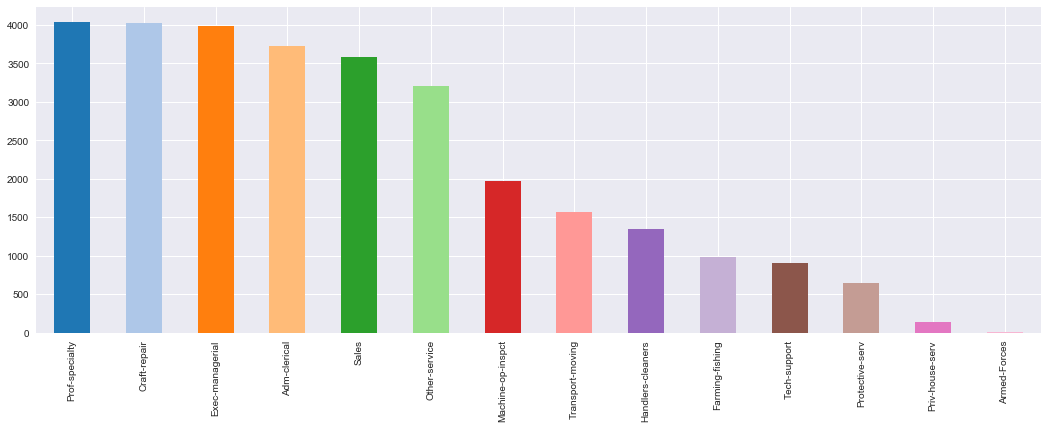

In [136]:
# option 2
df['occupation'].value_counts().plot(kind='bar',color=colors)

In [132]:
cmap = plt.cm.get_cmap('tab20')
colors = [cmap(value) for value in range(14)] # grab color from Tableau 20 color map for each record in the table


[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274, 1.0),
 (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 (1.0, 0.7333333333333333, 0.47058823529411764, 1.0),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353, 1.0),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
 (1.0, 0.596078431372549, 0.5882352941176471, 1.0),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589, 1.0),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451, 1.0),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058, 1.0)]

### Exercise: Count per `occupation`

Using grouping and aggregation functions, count how many people are per each occupation:

In [138]:
df.occupation.value_counts()

Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: occupation, dtype: int64

In [149]:
df.groupby('occupation').size().reset_index(name='count').set_index('occupation')

,count
occupation,
Adm-clerical,3721
Armed-Forces,9
Craft-repair,4030
Exec-managerial,3992
Farming-fishing,989
Handlers-cleaners,1350
Machine-op-inspct,1966
Other-service,3212
Priv-house-serv,143


### Exercise: Display capital gains per occupation

Capital gain is defined as _"income from investment sources, apart from wages/salary"_, is basically people generating profits from investments out of their regular job. Show the **average** capital gain per occupation. It should look something like this:

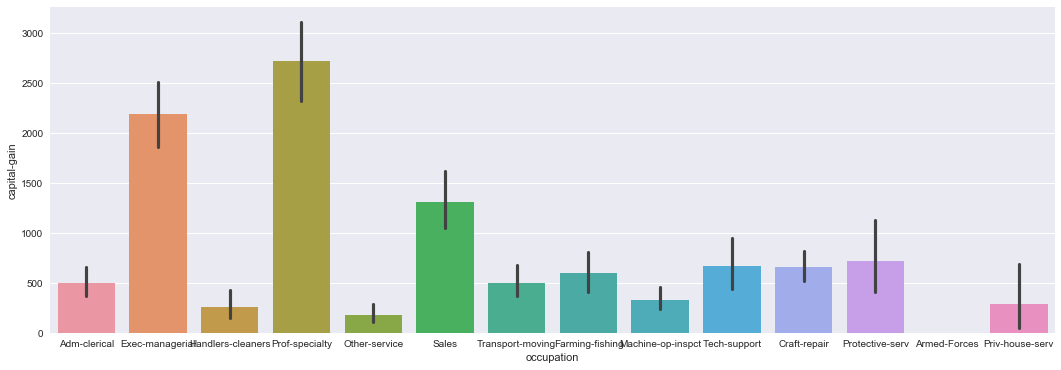

In [83]:
# Expected result:

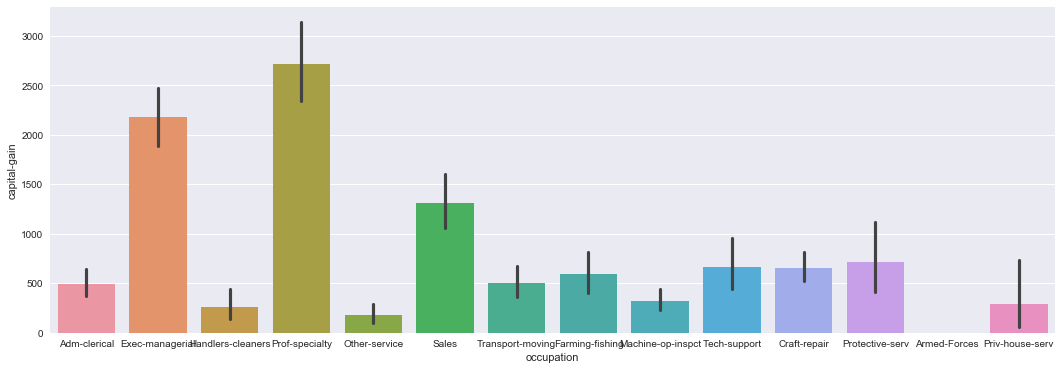

In [154]:
sns.barplot(x='occupation',y='capital-gain', data=df, estimator=np.mean)

In [150]:
sns.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
age               30162 non-null int64
workclass         30162 non-null object
fnlwgt            30162 non-null int64
education         30162 non-null object
education-num     30162 non-null int64
marital-status    30162 non-null object
occupation        30162 non-null object
relationship      30162 non-null object
race              30162 non-null object
sex               30162 non-null object
capital-gain      30162 non-null int64
capital-loss      30162 non-null int64
hours-per-week    30162 non-null int64
native-country    30162 non-null object
income            30162 non-null object
dtypes: int64(6), object(9)
memory usage: 4.9+ MB


### Exercise: Use grouping to obtain the same results as the previous plot

Using grouping functions, generate the same results as the plot above. Expected output:

In [110]:
# Expected result

occupation
Adm-clerical          497.097286
Armed-Forces            0.000000
Craft-repair          657.586849
Exec-managerial      2185.330912
Farming-fishing       592.707786
Handlers-cleaners     258.140000
Machine-op-inspct     323.825025
Other-service         181.705479
Priv-house-serv       291.594406
Prof-specialty       2717.880139
Protective-serv       713.596273
Sales                1308.637835
Tech-support          668.105263
Transport-moving      498.121501
Name: capital-gain, dtype: float64

### Exercise: Bar plot: average capital gain per race and group

Create a bar plot that shows in that has `race` as the X axis, a `sex` hue and displays the average capital gain for each group. Expected output:

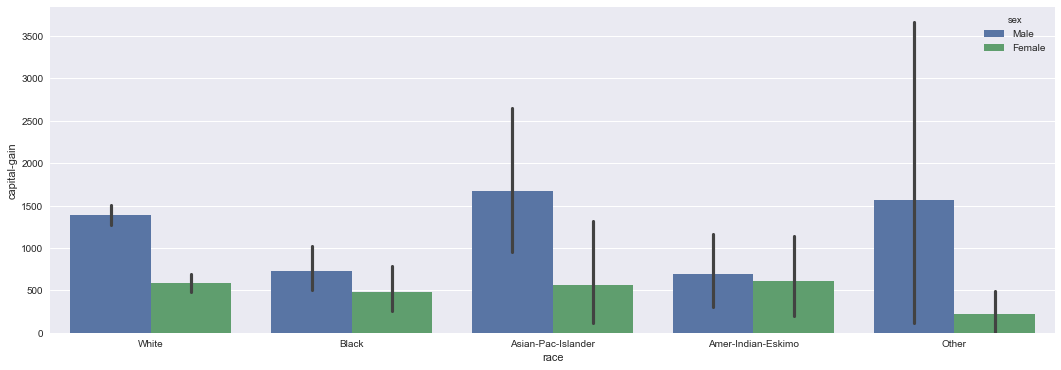

In [89]:
# Expected output

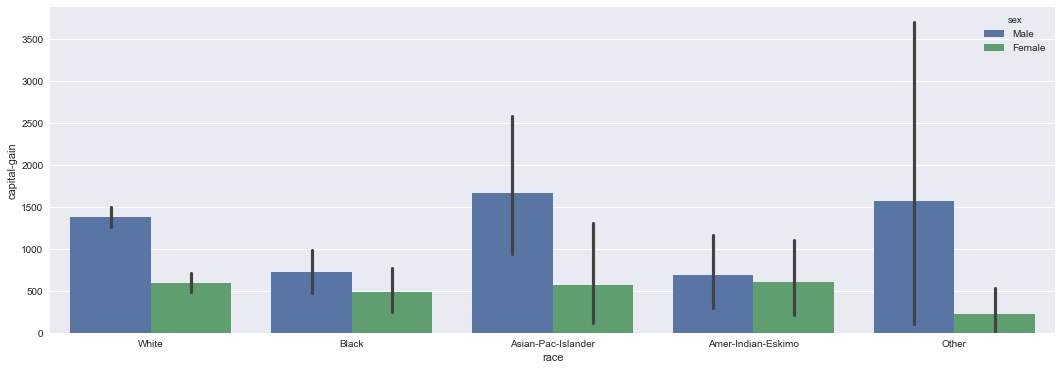

In [156]:
sns.barplot(x='race',y='capital-gain', hue='sex',data=df, estimator=np.mean)

### Exercise: Use grouping to obtain the same results as the previous plot

Use group functions to generate the values plotted above. You're basically grouping by `race` and `sex` and computing the average capital gain per group.

In [92]:
# Expected output

race                sex   
Amer-Indian-Eskimo  Female     605.682243
                    Male       692.932961
Asian-Pac-Islander  Female     564.204082
                    Male      1666.455907
Black               Female     484.871337
                    Male       722.966855
Other               Female     223.873563
                    Male      1566.208333
White               Female     588.850285
                    Male      1385.042466
Name: capital-gain, dtype: float64

In [158]:
df.groupby(['race','sex'])['race','sex','capital-gain'].mean()

capital-gain
race               sex                 
Amer-Indian-Eskimo Female    605.682243
                   Male      692.932961
Asian-Pac-Islander Female    564.204082
                   Male     1666.455907
Black              Female    484.871337
                   Male      722.966855
Other              Female    223.873563
                   Male     1566.208333
White              Female    588.850285
                   Male     1385.042466

![separator2](https://user-images.githubusercontent.com/7065401/39119518-59fa51ce-46ec-11e8-8503-5f8136558f2b.png)